In [147]:
using PyPlot
using CSV
using DataFrames
#using LaTeXStrings


In [148]:
#import PythonPlot
#PythonPlot.matplotlib.rcParams["font.size"] = 15

In [149]:
include("src/latt_para.jl")

lattice_params! (generic function with 1 method)

In [150]:
params = lattice_params!()

Dict{Symbol, Any} with 5 entries:
  :m_meson    => (203.655, 486.366)
  :threshold  => [1397.59, 1466.14, 1683.94, 1781.53]
  :decons_vec => [93.1531, 108.23, 119.217, 108.23]
  :L          => 0.0205243
  :mch        => [(203.655, 1193.94), (486.366, 979.777), (551.1, 1132.84), (48…

In [151]:
#=function attribute!(Plots)
    #=Style settings can refer to:
    https://juliadatascience.io/aog_custom
    https://docs.juliaplots.org/latest/tutorial/#Plot-Attributes
    https://www.matecdev.com/posts/julia-plotting-font-size.html
    https://gr-framework.org/fonts.html
    =#
    st = Dict(
        :framestyle => :box,
        :lw => 2,
        :fontfamily =>"Computer Modern",
        :tickfontsize => 10,
        :titlefontsize => 10,
        :guidefontsize => 10,
        :legendfontsize => 10,
        :minorgrid => true
    )
    Plots.default(framestyle = st[:framestyle], 
                    minorgrid = st[:minorgrid],
                    titlefontsize = st[:titlefontsize],
                    tickfontsize = st[:tickfontsize],
                    guidefontsize = st[:guidefontsize],
                    lw = st[:lw],
                    colorbar_title_location=:right
                    )
    return nothing
end
attribute!(Plots)=#

In [152]:
#=function plot_Lambda1405_pole_1sigma!(pL::AbstractDataFrame, pH::AbstractDataFrame; nch=2, path="./figure/pole_coupling_2ch_LO_1sigma.pdf")
    alpha = 0.8

    m2 = (:circle,:rainbow, 6, Plots.stroke(0, :green))
    m1 = (:rect,:rainbow, 6,Plots.stroke(0, :green))
    label1 = nch == 2 ? "Lower pole on [+-]" : "Lower pole on [+---]"
    label2 = nch == 2 ? "Higher pole on [+-]" : "Higher pole on [+---]"
    # Lower pole
    sca = scatter(pL.repL, pL.impL, zcolor=pL.gsqr11, m=m1, label=label1, alpha=alpha)
    scatter!(pL.repL, -pL.impL, zcolor=pL.gsqr11, m=m1, label=false, alpha=alpha)

    # Higher pole
    scatter!(pH.repH, pH.impH, zcolor=pH.gsqr22, m=m2, label=label2, alpha=alpha)
    scatter!(pH.repH, -pH.impH, zcolor=pH.gsqr22, m=m2, label=false, alpha=alpha)

    vline!([params[:threshold][1]], label=L"m_{\pi\Sigma}", c=:black, linestyle=:dash)
    vline!([params[:threshold][2]], label=L"m_{\bar{K}N}", c=:black, linestyle=:dashdotdot)

    # plot lattice poles
    scatter!([1392, 1455], [0, -11.5], xerror=[9+2+16, 13+2+17], yerror=[0, 4.4+4+0.1], ms=7, label=false, c=:black, lw=2.5)
    scatter!([1455], [11.5], xerror=[13+2+17], yerror=[4.4+4+0.1], ms=7, label="Lattice pole", c=:black, lw=2.5)

    plot!(ylim=(-65, 65), xlim=(1364,1490))
    xlabel!(L"$Re[E]$ [MeV]"); ylabel!(L"$Im[E]$ [MeV]")
    annotate!(1495, -70, Plots.text(L"$|g_{ii}|$", 10))
    savefig(path)
    display(sca)
    return println("💖💖💖💖💖💖💖💖💖 This programing has run successfully!!! 💖💖💖💖💖💖💖💖💖")
end
=#

# 2 channels

In [153]:
path = ["./out/coupling/pH_coupling_1sigma_2ch_LO.csv", "./out/coupling/pL_coupling_1sigma_2ch_LO.csv"]
pH1sigma = DataFrame(CSV.File(path[1]));
pL1sigma = DataFrame(CSV.File(path[2]));

In [154]:
#pL1sigma = pL1sigma[pL1sigma.gsqr11 .< 4, 1:4]
#pH1sigma = pH1sigma[pH1sigma.gsqr22 .< 4, 1:4];

In [155]:
#plot_Lambda1405_pole_1sigma!(pL1sigma, pH1sigma)

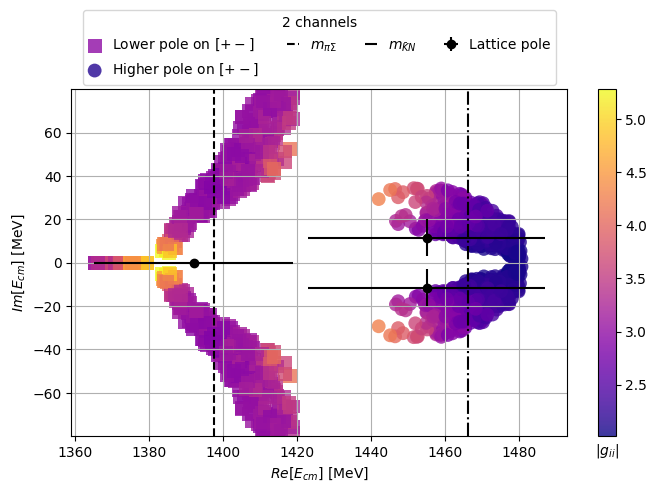

In [157]:
function plot_Lambda1405_pole_1sigma!(ax, pL::AbstractDataFrame, pH::AbstractDataFrame, params; nch=2)
    cmap = :plasma#:inferno#:terrain#:nipy_spectral#:brg
    alpha = 0.8
    edgecolors = "none"
    label1 = nch == 2 ? L"Lower pole on $[+-]$" : "Lower pole on [+---]"
    label2 = nch == 2 ? L"Higher pole on $[+-]$" : "Higher pole on [+---]"

    ymax = maximum(pL.impL)
    ax.set(xlabel=L"$Re[E_{cm}]$ [MeV]", ylabel=L"$Im[E_{cm}]$ [MeV]", ylim=(-ymax, ymax))

    nor = PyPlot.matplotlib.colors.Normalize(minimum(vcat(pL.gsqr11, pH.gsqr22)), maximum(vcat(pL.gsqr11, pH.gsqr22)) )
    
    sca = ax.scatter([pL.repL pL.repL], [pL.impL -pL.impL], c=[pL.gsqr11 pL.gsqr11], norm=nor, alpha=alpha, label=label1, cmap=cmap, marker="s", s=99, edgecolors=edgecolors)


    ax.scatter([pH.repH pH.repH], [pH.impH -pH.impH], c=[pH.gsqr22 pH.gsqr22], norm=nor, alpha=alpha, label=label2, cmap=cmap, marker="o", s=99, edgecolors=edgecolors)
    ax.vlines(params[:threshold][1], -ymax, ymax, label=L"m_{\pi\Sigma}", color=:black, linestyles=:dashed)
    ax.vlines(params[:threshold][2], -ymax, ymax, label=L"m_{\bar{K}N}", color=:black, linestyles=:dashdot)
    ax.errorbar([1392, 1455], [0, -11.5], xerr=[9+2+16, 13+2+17], yerr=[0, 4.4+4+0.1], fmt="o", color=:black)
    ax.errorbar([1455], [11.5], xerr=[13+2+17], yerr=[4.4+4+0.1], fmt="o", color=:black, label="Lattice pole")
    ax.grid()
    #ax.legend()
    ax.legend(loc="upper center" , bbox_to_anchor=(0.5, 1.25), ncol=4, fancybox=true, handlelength=0.9, title= nch==2 ? "2 channels" : "4 channels")
    return sca
end
fig, ax = PyPlot.subplots(figsize=(8, 4.5))
sca = plot_Lambda1405_pole_1sigma!(ax, pL1sigma, pH1sigma, params)
clb = fig.colorbar(sca, ax=ax)
clb.ax.set(xlabel=L"|g_{ii}|")
path="./figure/pole_coupling_2ch_LO_1sigma.pdf"
fig.savefig(path)
PyPlot.gcf()

# 4 channels 

In [159]:
path = ["./out/coupling/pH_coupling_1sigma_4ch_LO.csv", "./out/coupling/pL_coupling_1sigma_4ch_LO.csv"]
pH1sigma4ch = DataFrame(CSV.File(path[1]))
pL1sigma4ch = DataFrame(CSV.File(path[2]));

#pL1sigma4ch = pL1sigma4ch[pL1sigma4ch.gsqr11 .< 4, 1:end]
#pH1sigma4ch = pH1sigma4ch[pH1sigma4ch.gsqr22 .< 4, 1:end];

Row,repL,impL,gsqr11,gsqr22,gsqr33,gsqr44
,Float64,Float64,Float64,Float64,Float64,Float64
1,1415.9,70.0452,3.04275,1.91554,0.631417,0.729393
2,1400.15,29.2504,3.09685,2.89841,1.03217,0.698456
3,1390.18,16.2372,3.23809,3.00252,0.985804,0.714742
4,1398.66,28.1326,3.02152,2.74403,0.942298,0.680464
5,1414.1,28.2684,3.41368,4.04408,1.73499,0.77002
6,1411.77,59.3339,3.10361,2.13568,0.710422,0.735822
7,1411.91,64.5751,3.1162,2.07388,0.700573,0.740694
8,1391.61,25.9787,2.99994,2.23952,0.603188,0.68323
9,1369.27,2.01159e-9,3.50945,2.89709,0.77485,0.735116


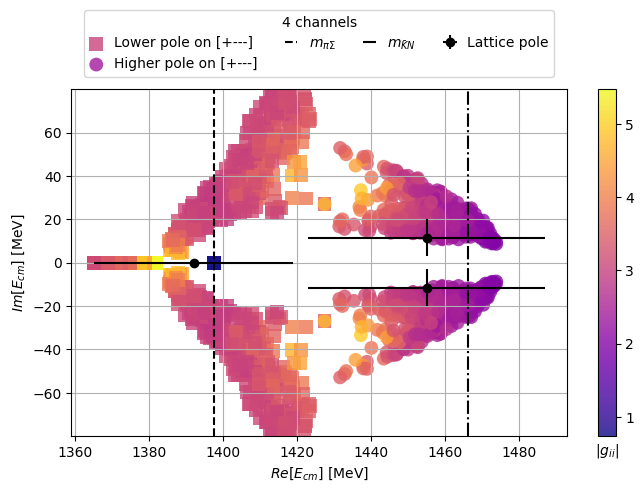

In [160]:
fig, ax = PyPlot.subplots(figsize=(8, 4.5))
sca = plot_Lambda1405_pole_1sigma!(ax, pL1sigma4ch, pH1sigma4ch, params, nch=4)
clb = fig.colorbar(sca, ax=ax)
clb.ax.set(xlabel=L"|g_{ii}|")
path="./figure/pole_coupling_4ch_LO_1sigma.pdf"
fig.savefig(path)
PyPlot.gcf()